In [1]:
import geopandas as gpd
import pandas as pd
import pendulum

date = "2019-01-14"
line = "804"
schedule = pd.read_csv(f"data/schedule/{line}_lametro-rail/{date}.csv", index_col=0, parse_dates=["datetime"])
trains = pd.read_csv(f"data/vehicle_tracking/processed/{line}_lametro-rail/{date}.csv", index_col=0)
stations = pd.read_csv(f"data/line_info/{line}/{line}_directionA_stations.csv", index_col=0)

trains.loc[:,"datetime"] = pd.to_datetime(trains.datetime.apply(lambda x: pendulum.parse(x).in_tz("America/Los_Angeles").format("YYYY-MM-DD HH:mm:ss")))

In [4]:
from analyzer.visualizer import Marey
import pendulum
import numpy as np

start = schedule.datetime.min() + np.timedelta64(12, 'h')
end = start + np.timedelta64(6, 'h')

schedule_positions = pd.merge(schedule[schedule['direction_id'] == 0], stations, on='stop_id')[['datetime', 'trip_id', 'relative_position']]
m = Marey(start, end, trains[trains['direction'] == 0], schedule_positions, stations)
"DONE"

'DONE'

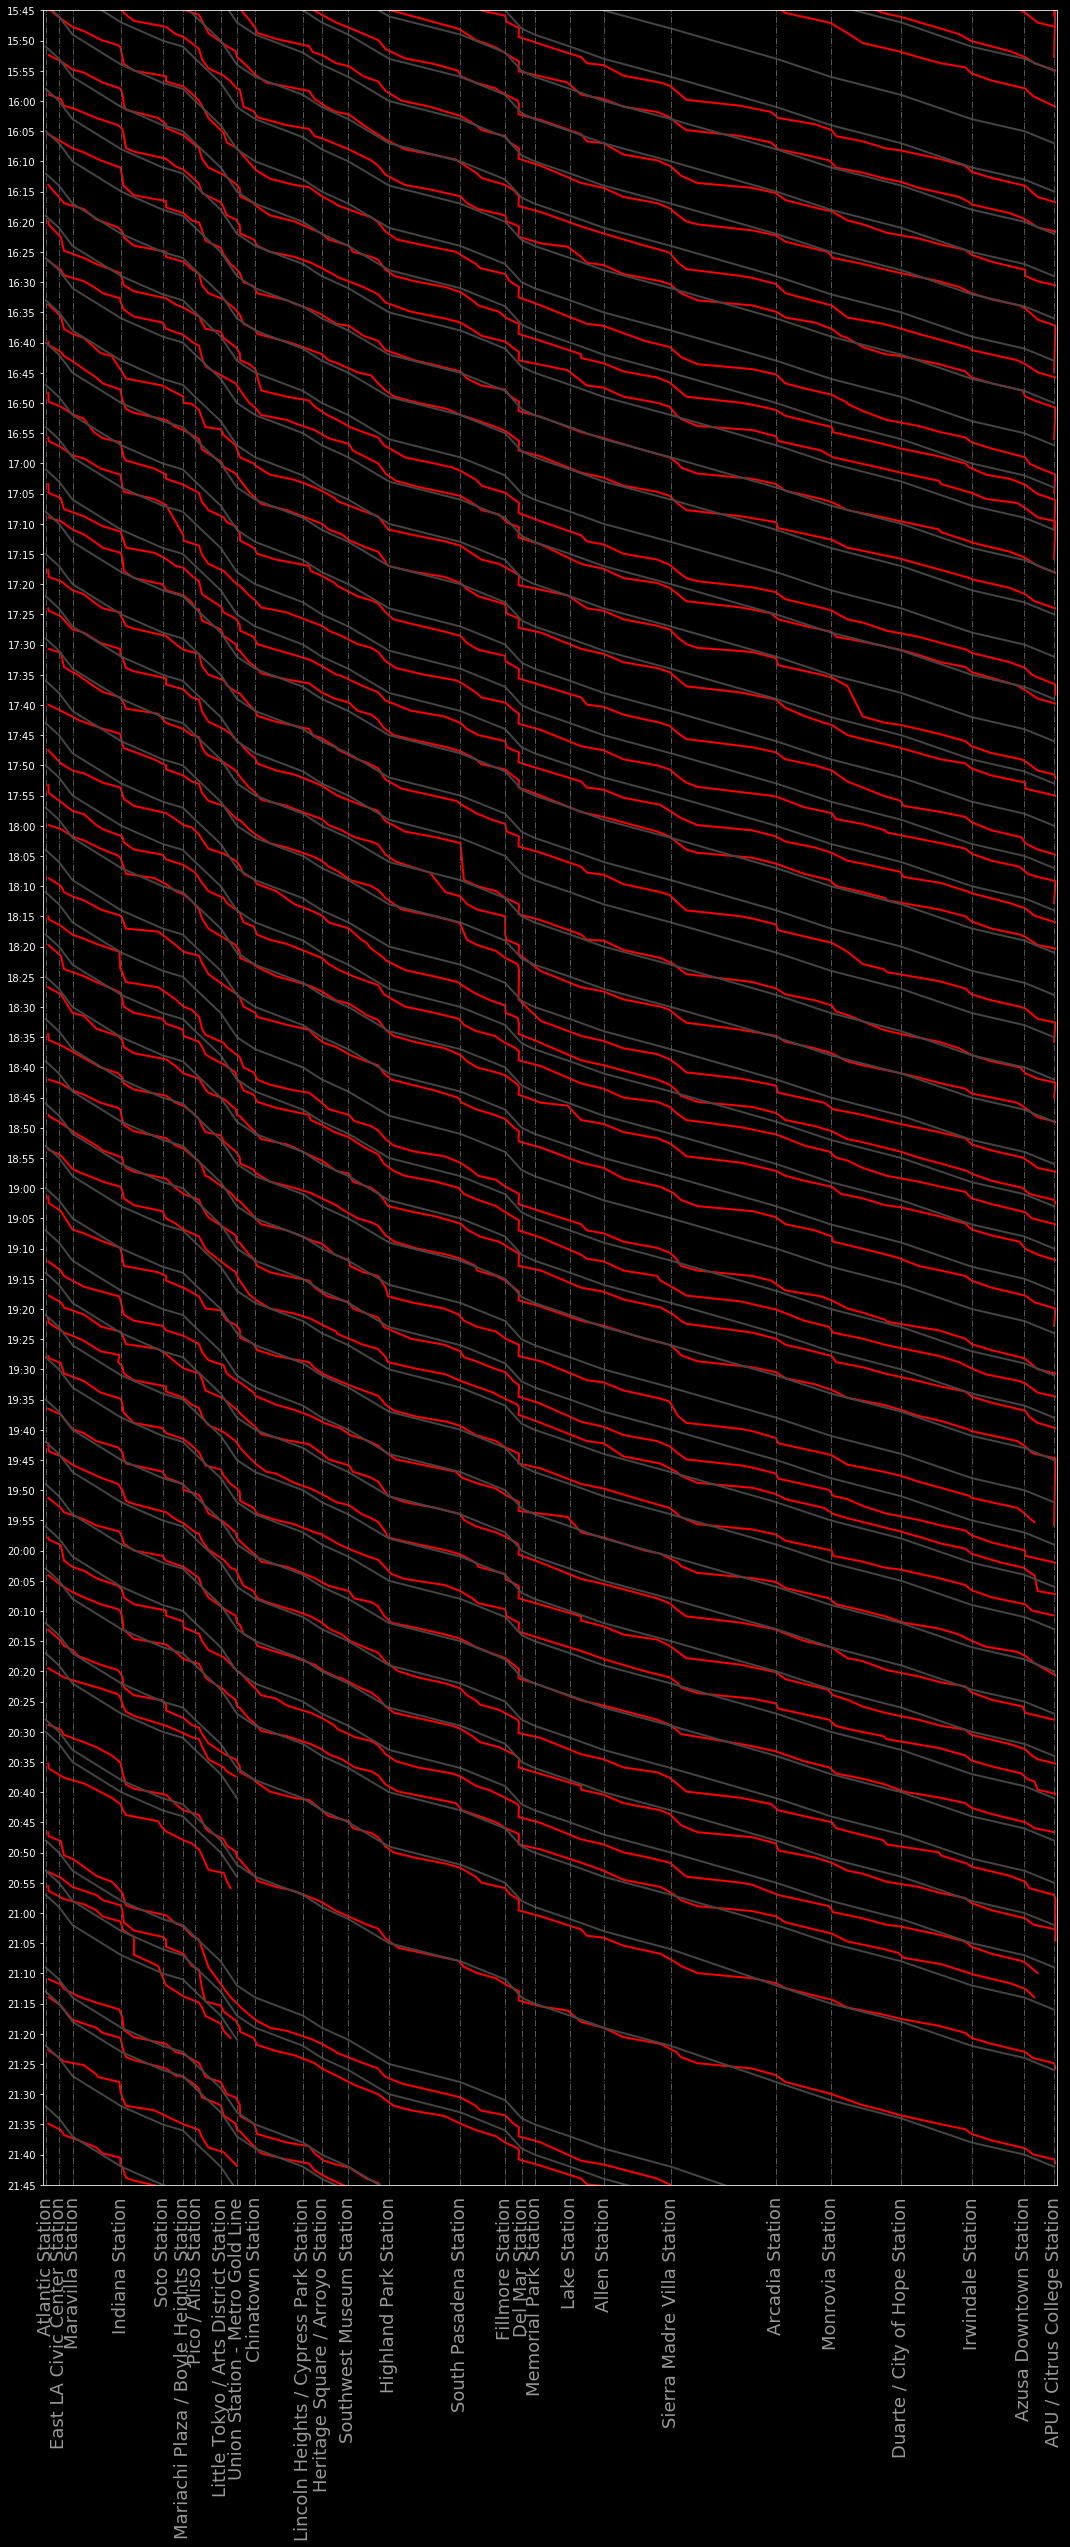

In [5]:
m.plot(40, 40)